# Project wine.
The goal of this project is to learn and understand how components of red Portuguese "Vinho Verde" wine impact its quality

# Data description:
data file 'winequality-red.csv' contains information of over 1500 distinct wines chemical ingredients and their quality.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm
import random
from scipy import stats

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

# Classifying quality:
classifying quality variables into:
1 - great quality wine
0 - poor quality wine

in order to use logistic regression



In [6]:
def func(x):
    if x >= 7:
        return 1
    elif x < 7:
        return 0   

In [7]:
df['class'] = df['quality'].apply(func) 


In [8]:
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [9]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [10]:
df.drop(df['quality'] == 6,axis = 1,inplace = True)

# visualizing data:


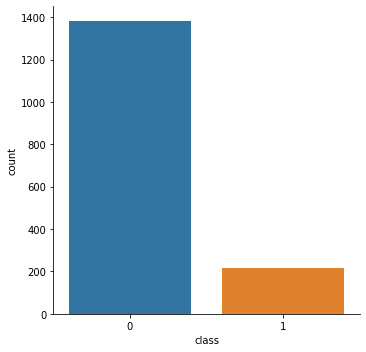

In [9]:
sns.catplot(x = 'class',kind = 'count', data = df)

In [12]:
good_quality = round(len(df[df['class'] == 1]['class'])/len(df),3)
poor_quality = 1 - good_quality
print('percentage of good quality wine in data set:',good_quality)
print('percentage of poor quality wine in data set:',poor_quality)

percentage of good quality wine in data set: 0.136
percentage of poor quality wine in data set: 0.864


In [13]:
feat_cols = df.columns

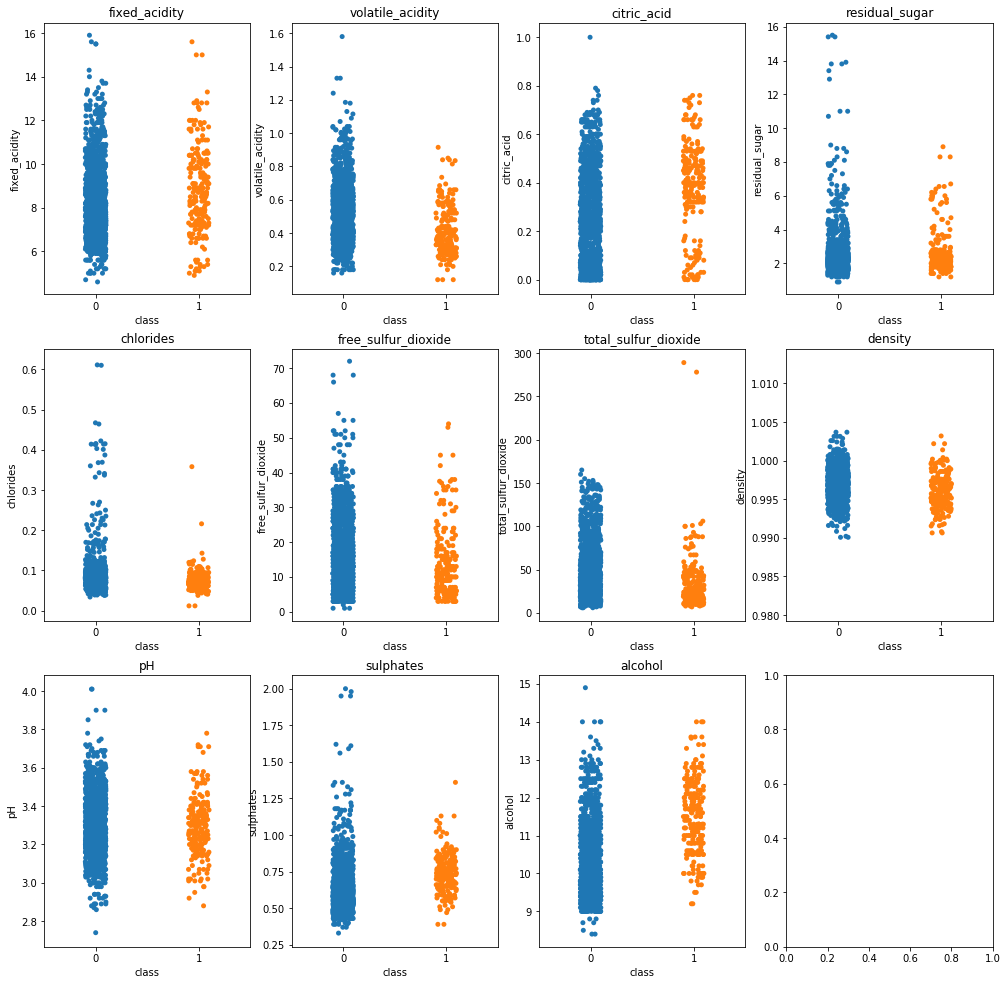

In [14]:
fig, axs = plt.subplots(3,4,figsize = (17,17))

axs[0,0].set_title(feat_cols[0])
axs[0,1].set_title(feat_cols[1])
axs[0,2].set_title(feat_cols[2])
axs[0,3].set_title(feat_cols[3])
axs[1,0].set_title(feat_cols[4])
axs[1,1].set_title(feat_cols[5])
axs[1,2].set_title(feat_cols[6])
axs[1,3].set_title(feat_cols[7])
axs[2,0].set_title(feat_cols[8])
axs[2,1].set_title(feat_cols[9])
axs[2,2].set_title(feat_cols[10])



sns.stripplot(x = 'class', y = 'fixed_acidity',data =df,ax = axs[0,0])
sns.stripplot(x = 'class', y = 'volatile_acidity',data = df, ax =axs[0,1])
sns.stripplot(x = 'class', y = 'citric_acid',data = df, ax = axs[0,2])
sns.stripplot(x = 'class', y = 'residual_sugar', data = df, ax = axs[0,3])
sns.stripplot(x = 'class', y = 'chlorides', data = df, ax = axs[1,0])
sns.stripplot(x = 'class', y = 'free_sulfur_dioxide', data = df, ax = axs[1,1])
sns.stripplot(x = 'class', y = 'total_sulfur_dioxide', data = df, ax = axs[1,2])
sns.stripplot(x = 'class', y = 'density', data = df, ax = axs[1,3])
sns.stripplot(x = 'class', y = 'pH', data = df, ax = axs[2,0])
sns.stripplot(x = 'class', y = 'sulphates', data = df, ax = axs[2,1])
sns.stripplot(x = 'class', y = 'alcohol', data = df, ax = axs[2,2])



# Getting rid of outliers:
After observing stripplots above, I have noticed that there are a few outliers in column "total sulfur dioxide". Below  I will get rid of those few data points that disrupt data. There are more outliers in this data, but because y axis range in relatively smaller in other components I have decided to leave them be.

In [15]:
IQR =  np.percentile(df['total_sulfur_dioxide'], 75, interpolation = 'midpoint') -  np.percentile(df['total_sulfur_dioxide'], 25, interpolation = 'midpoint')
np.percentile(df['total_sulfur_dioxide'], 75, interpolation = 'midpoint') + IQR * 3

outlier1 = max(df['total_sulfur_dioxide'] )

df[df['total_sulfur_dioxide'] == outlier1]

df = df.drop(1081)

In [16]:
outlier2 = max(df['total_sulfur_dioxide'] )
df[df['total_sulfur_dioxide'] == outlier2]

df = df.drop(1079)

# Multicollinearity check:
Observed heatmap shows that there is no significant correlation.

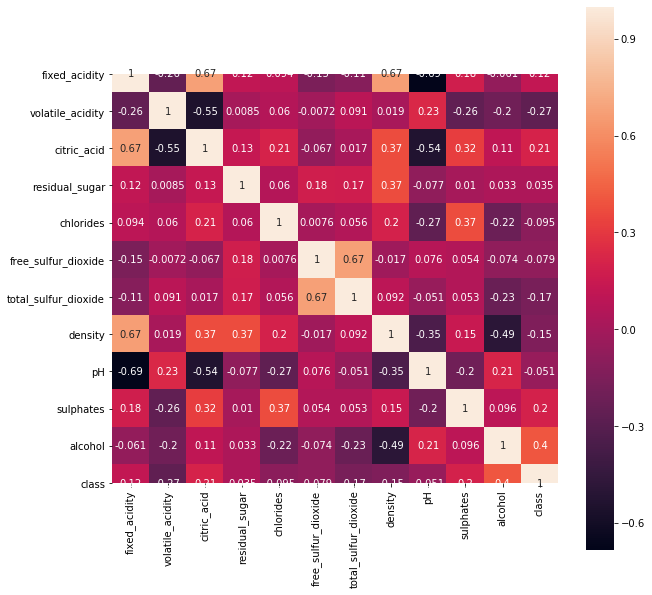

In [17]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(df.corr(), annot=True,square = True ,ax=ax)

# forecasting
To forcast I have decided to use Logistic Regression. I have trained my model with 80% of data and tested it with 20% of data.
However, given test produced only 0.51 f1-score wich indicates that this model is not good.

In [18]:
feat_cols = feat_cols.drop('class')

x = df[feat_cols]
y = df['class']


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [20]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

C:\Users\Domantas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
coeff_df = pd.DataFrame(logmodel.coef_.T, x.columns, columns = ['Coefficients'])
print(coeff_df)
print('Intercept:             ',logmodel.intercept_)

                      Coefficients
fixed_acidity            -0.059226
volatile_acidity         -2.417733
citric_acid               0.379193
residual_sugar            0.047298
chlorides                -1.331904
free_sulfur_dioxide       0.033962
total_sulfur_dioxide     -0.030097
density                  -1.312948
pH                       -2.418912
sulphates                 2.269042
alcohol                   0.867571
Intercept:              [-1.30957853]


In [22]:
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       278
           1       0.68      0.40      0.51        42

    accuracy                           0.90       320
   macro avg       0.80      0.69      0.72       320
weighted avg       0.88      0.90      0.89       320



# Solving imbalanced classes problem
Logistic regression model above has poor recall and f1-score.The problem can be seen in first bar chart illustrating class distribution in data set. To solve this issue I will take such sample of bad wines that is equal in size to the Good wine data in original data frame.

In [23]:
bad = df[df['class'] == 0].sample(n = len(df[df['class'] == 1]))
df2 = df[df['class'] == 1]
df2 = df2.append(bad)

In [24]:
X = df2[feat_cols]
Y = df2['class']


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [26]:
logmodel2 = LogisticRegression()
logmodel2.fit(X_train, Y_train)

C:\Users\Domantas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Comparing models
second model (coeff_df2) has increased coefficients (effects on dependant variable 'class') and f1-score has increased by 0.3 and reached 0.8. This indicates that imbalanced class problem was damaging prior model hugely. Second model let us predict wine quality based on its chemical components in accuracy of 80 %.

In [27]:
coeff_df2 = pd.DataFrame(logmodel2.coef_.T, X.columns, columns = ['Coefficients'])
print(coeff_df2)
print('Intercept:             ',logmodel2.intercept_)

                      Coefficients
fixed_acidity             0.003261
volatile_acidity         -1.734393
citric_acid               0.727285
residual_sugar            0.064890
chlorides                -0.956731
free_sulfur_dioxide       0.022258
total_sulfur_dioxide     -0.031236
density                  -1.152991
pH                       -2.474889
sulphates                 1.908904
alcohol                   0.984140
Intercept:              [-1.15366758]


In [28]:
print(coeff_df)
print('Intercept:             ',logmodel.intercept_)

                      Coefficients
fixed_acidity            -0.059226
volatile_acidity         -2.417733
citric_acid               0.379193
residual_sugar            0.047298
chlorides                -1.331904
free_sulfur_dioxide       0.033962
total_sulfur_dioxide     -0.030097
density                  -1.312948
pH                       -2.418912
sulphates                 2.269042
alcohol                   0.867571
Intercept:              [-1.30957853]


In [29]:
predictions2 = logmodel2.predict(X_test)
print(classification_report(Y_test, predictions2))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        45
           1       0.76      0.85      0.80        41

    accuracy                           0.80        86
   macro avg       0.81      0.80      0.80        86
weighted avg       0.81      0.80      0.80        86



In [30]:
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       278
           1       0.68      0.40      0.51        42

    accuracy                           0.90       320
   macro avg       0.80      0.69      0.72       320
weighted avg       0.88      0.90      0.89       320



In [33]:
est = smf.logit('class ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol',df).fit()
# I have expierenced a problem with this part of code and therefore I cannot inspect P-values of models.

SyntaxError: invalid syntax (<unknown>, line 1)

# Improvements that could be done
First. classes should be split into: 1 (quality score from 7 to 10) and 0 (quality score from 0 to 5). wines with quality score equal to 6 should be dropped from data frame, because difference between 6 and 7 qualities wine are little and it influences model a lot.

second. smf.logit part of code has to be fixed to obtain p-values.

third. more graphs regarding probability distribution of variable should be done.